<a href="https://colab.research.google.com/github/benjamingonzalez10-afk/PortafolioCDDPEc/blob/Etapa_2/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de la api del banco mundial

La versión 1.0.4 del  paquete wbgapi de Python  ya está disponible. Este paquete lleva casi un año en el  Índice de Paquetes de Python  y la última versión incorpora varias funciones nuevas para que la exploración y la búsqueda en bases de datos sean más sencillas e interactivas.

In [2]:
#Instalar biblioteca
%pip install wbgapi
%pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=5efd17de40c2c87ec95c05fb151aa77ff6c447a7ad6d55d10d8f31d073ed57e5
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=e339e4e23f2cbf7bbe8481c94a5268beacc11715644d26aa094d3931953d38f6
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute


In [3]:
import wbgapi as wb
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive')

import my_func as fn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2

Mounted at /content/drive


Importaremos información del banco mundial

In [4]:
import my_func as fn

In [5]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [6]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [7]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [8]:
#Seleccionar solamente paises con ISO.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [9]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


### Limpieza de la base de datos


#### Eliminar variables con muchos datos faltantes
Criterio:
- Si "NaN" >= 10%, se elimina la variable
- Si "NaN" < 10%, se conserva la variable

In [10]:
(df_wb_raw.isna().sum() / len(df_wb_raw)>= 0.1).sum()

np.int64(36)

In [11]:
 lista = []
for i in df_wb_raw.columns:
  if df_wb_raw[i].isna().sum()/ len(df_wb_raw)>= 0.1:
    df_wb_raw.drop(i, axis = 1, inplace = True)
    lista.append(i)
print(f'Se eliminaron {len(lista)} columnas')

Se eliminaron 36 columnas


In [12]:
(df_wb_raw.isna().sum() / len(df_wb_raw)> 0).sum()

np.int64(14)

In [13]:
print(f"Todavía quedan {(df_wb_raw.isna().sum() / len(df_wb_raw)> 0).sum()} columnas con datos nulos")

Todavía quedan 14 columnas con datos nulos


#### Imputación de datos

Se utilizarán dos modelos, uno paramétrico y uno no paramétrico, luego se compararán ambos y se utilizará el más preciso.

In [14]:
#crear una lista con las columnas con datos faltantes
df_faltante = []
for i in df_wb_raw.columns:
  if df_wb_raw[i].isna().sum()/ len(df_wb_raw)> 0 :
    df_faltante.append(i)
print(f"Columnas con datos faltantes: {df_faltante}")

Columnas con datos faltantes: ['SP.RUR.TOTL.ZG', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'GE.EST', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EN.GHG.CO2.IP.MT.CE.AR5', 'EG.CFT.ACCS.ZS', 'EG.CFT.ACCS.RU.ZS', 'EG.CFT.ACCS.UR.ZS']


##### Imputación Paramétrica (media)

In [15]:
dfmedia = df_wb_raw.copy()
dfmedia = dfmedia.drop(columns = ['country','Country'])
from sklearn.impute import SimpleImputer
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = simple.fit_transform(dfmedia)
dfmedia = pd.DataFrame(imputer, columns = dfmedia.columns)


##### Imputación No paramétrica (FancyImpute)

In [16]:
from fancyimpute import IterativeImputer
df = df_wb_raw.copy()
# Inicializar imputador IterativeImputer
mice_imputer = IterativeImputer()

# Ajustar y transformar
imputed_mice = mice_imputer.fit_transform(df[df_faltante])

# Guardar como DataFrame
df_imputed_mice = pd.DataFrame(imputed_mice, columns=df[df_faltante].columns)

##### Comparación de los modelos

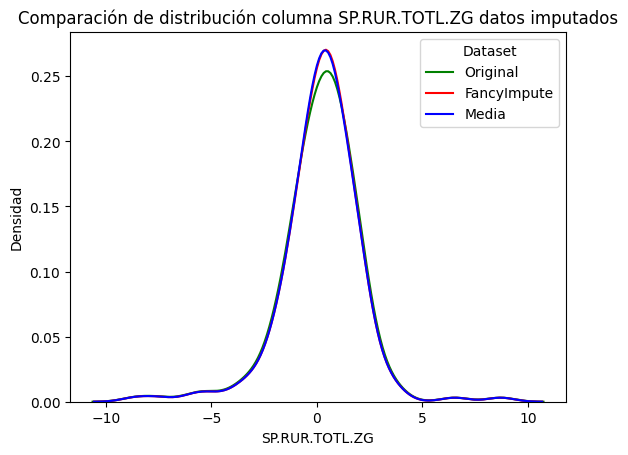

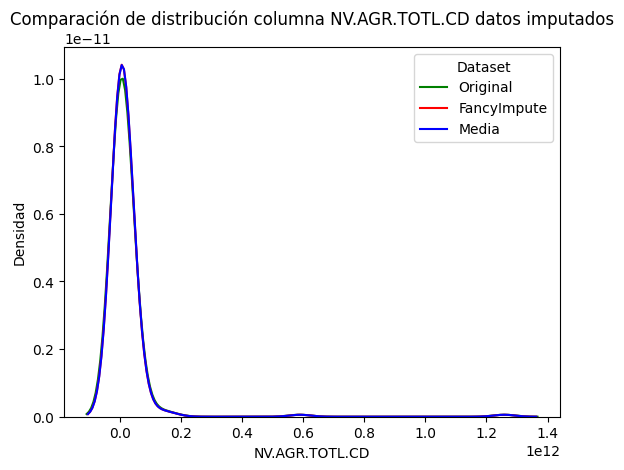

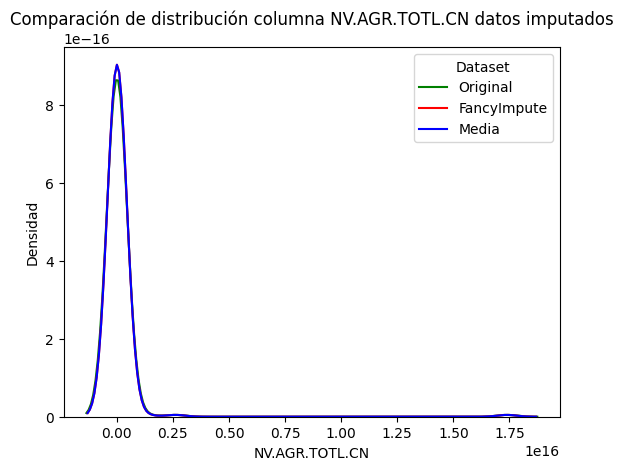

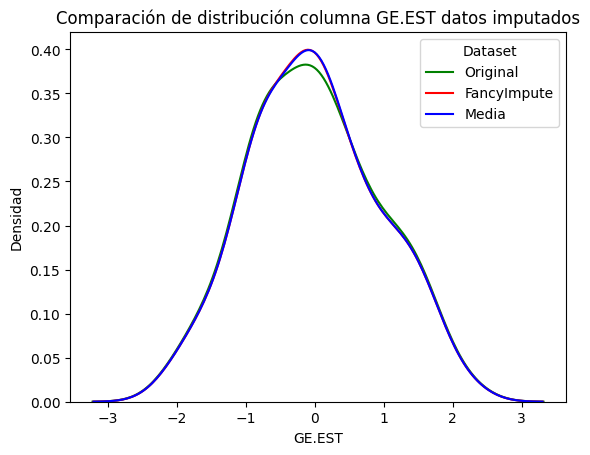

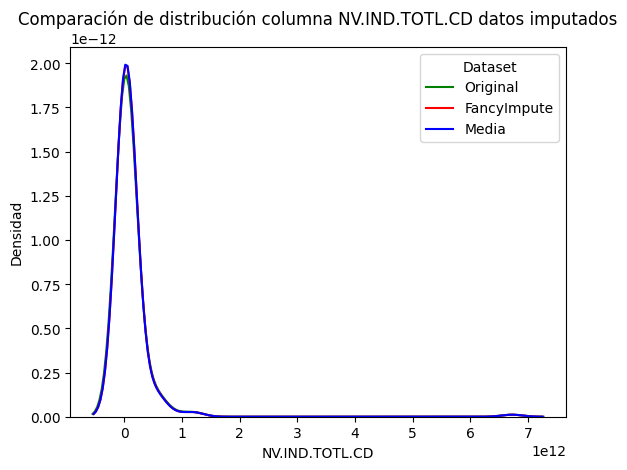

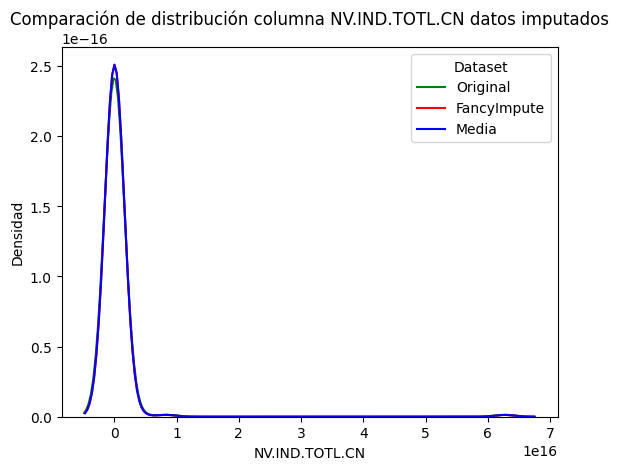

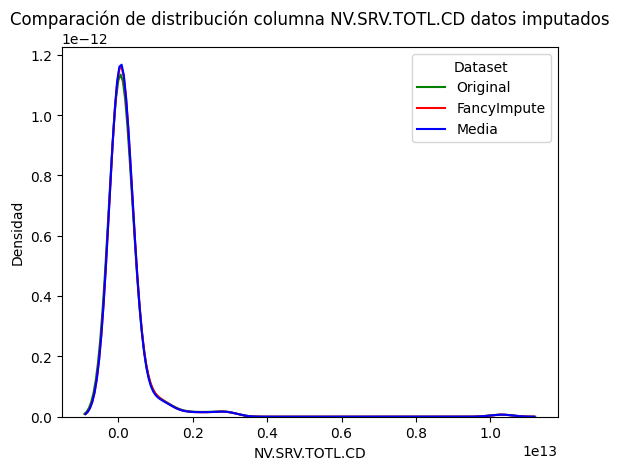

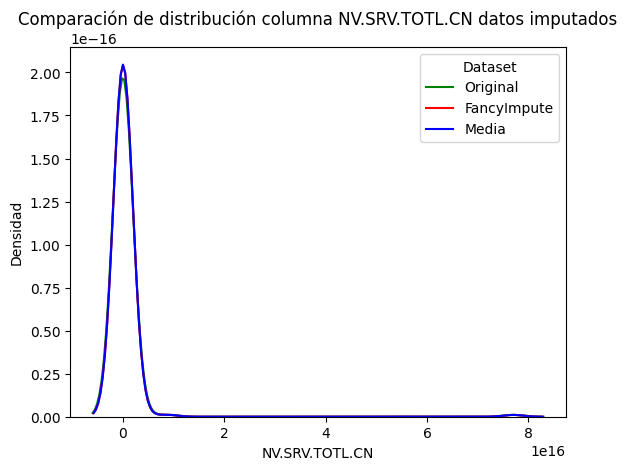

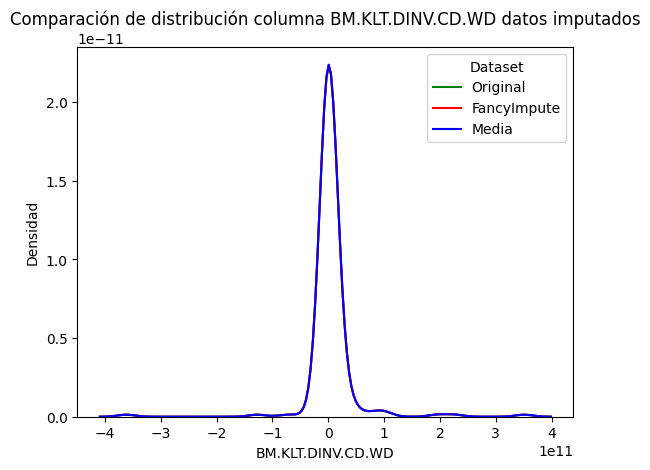

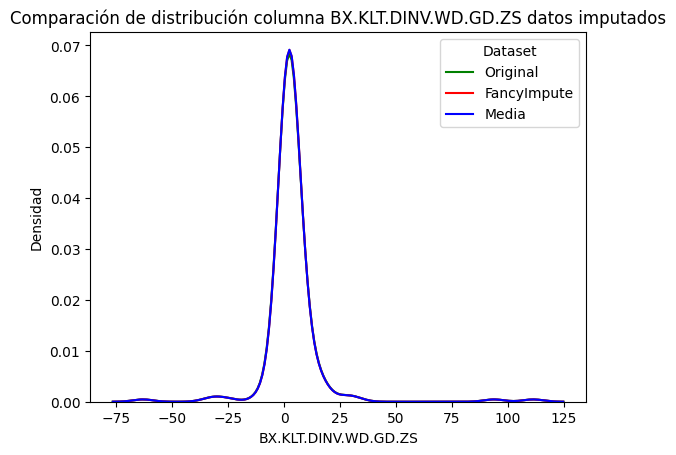

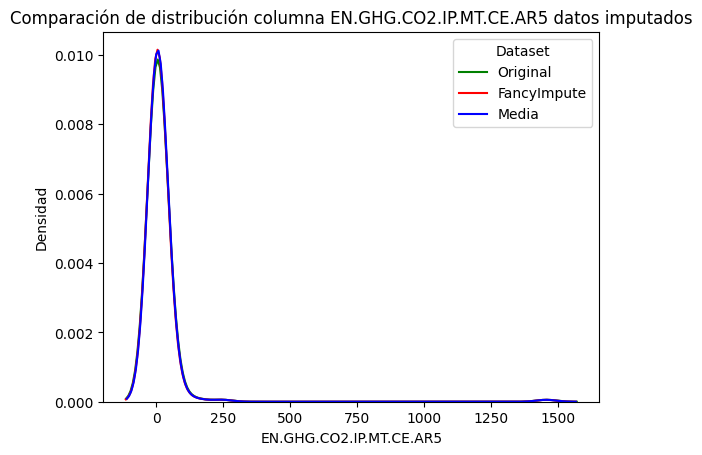

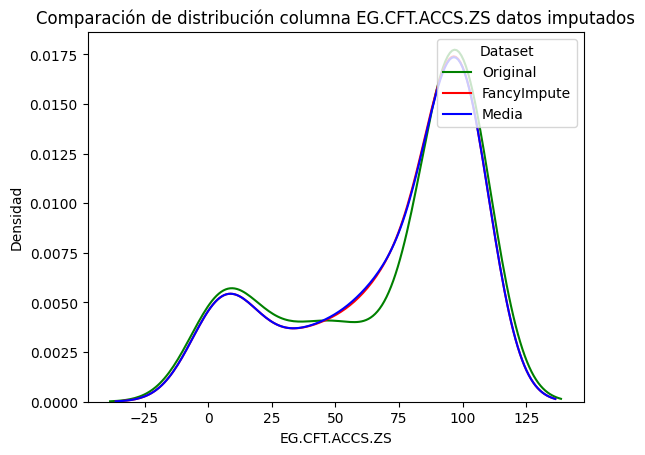

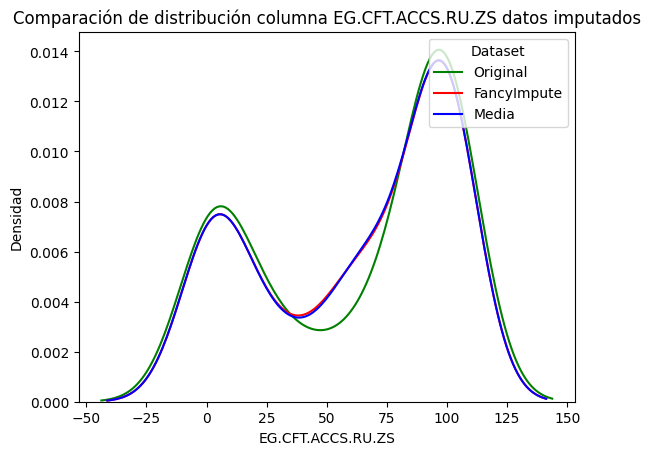

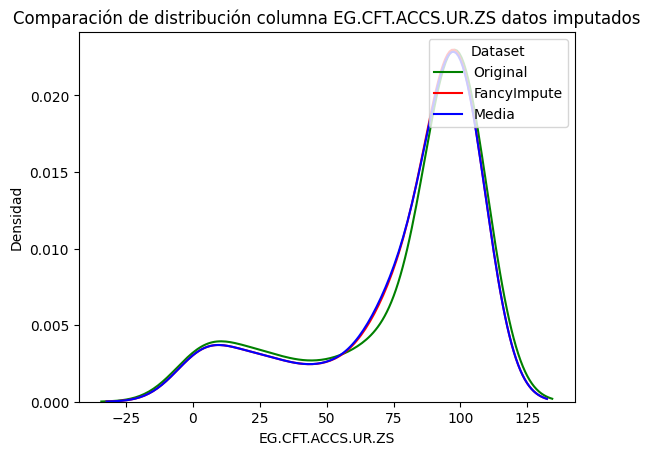

In [17]:
columnas = df[df_faltante].columns

for col in columnas:

  # Gráfico KDE comparando dos datasets
  sns.kdeplot(data=df_wb_raw, x= col, label='Original', color='green')
  sns.kdeplot(data=df_imputed_mice, x=col, label='FancyImpute', color='red')
  sns.kdeplot(data=dfmedia, x=col, label='Media', color='blue')

  # Agregar leyenda
  plt.legend(title='Dataset', loc='upper right')


  # Personalizar el gráfico
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")

  plt.show()

Ambos métodos son bastante parecidos, por lo que no habrá gran diferencia entre escoger uno o el otro. Nos quedamos con FancyImpute

In [18]:
df[df_faltante] = df_imputed_mice # Se agregan los datos nuevos a la base original

### Análisis descriptivo


In [21]:
df

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.348446e+10,3.050000e+07,1.684321,0.963600,30.700000,65.013,62.775,60.226,7.500000,77.000000
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,3.167001e+11,1.532150e+08,2.324653,1.290500,9.200000,68.673,66.349,63.936,2.300000,16.800000
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,1.044720e+10,3.159065e+06,0.580098,-3.507426,69.968564,71.502,65.170,59.691,60.865185,78.950134
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,4.364896e+15,-1.550000e+09,4.264071,50.189800,98.700000,79.264,74.588,69.877,98.700000,99.400000
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,5.135585e+14,4.399200e+06,0.830619,0.001100,20.600000,73.927,71.477,69.445,9.000000,52.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.274279e+13,3.335616e+07,-1.977864,1.797700,50.200000,67.144,64.617,62.099,8.400000,75.000000
194,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.741340e+09,2.215940e+08,7.285975,-3.795838,100.000000,86.107,84.041,82.100,100.000000,100.000000
195,DZA,Algeria,6.998184e+11,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,1.533987e+13,1.655830e+08,0.489819,16.388400,99.700000,77.696,76.261,74.895,99.100000,99.900000
196,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,1.126932e+12,2.627767e+08,6.900370,0.818600,86.100000,81.446,79.602,77.728,72.500000,95.200000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SP.POP.GROW              198 non-null    float64
 4   SP.POP.TOTL              198 non-null    float64
 5   SP.POP.TOTL.FE.IN        198 non-null    float64
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64
 7   SP.POP.TOTL.MA.IN        198 non-null    float64
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64
 9   SP.URB.GROW              198 non-null    float64
 10  SP.URB.TOTL              198 non-null    float64
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64
 12  SP.RUR.TOTL              198 non-null    float64
 13  SP.RUR.TOTL.ZG           198 non-null    float64
 14  SP.RUR.TOTL.ZS           1

In [29]:
print(f"El dataset tiene {df.shape[0]} países, {df.shape[1]-1} variables y {df.shape[0]*(df.shape[1]-1)} observaciones")

El dataset tiene 198 países, 30 variables y 5940 observaciones


In [31]:
df.describe()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
count,1.980000e+02,198.000000,1.980000e+02,1.980000e+02,198.000000,1.980000e+02,198.000000,198.000000,1.980000e+02,198.000000,...,1.980000e+02,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,8.388712e+11,1.152752,3.999611e+07,1.987776e+07,49.973491,2.011836e+07,50.026509,1.729545,2.289674e+07,62.205392,...,5.135589e+14,5.170434e+09,3.542150,16.173751,70.386176,76.119303,73.476060,70.910354,62.191554,78.585603
std,3.129922e+12,1.576210,1.484957e+08,7.252840e+07,2.993389,7.598056e+07,2.993389,1.826024,8.019058e+07,22.722526,...,5.513127e+15,4.541265e+10,12.889806,105.893027,34.968078,7.221813,7.085527,7.104323,39.618983,31.059949
min,5.705451e+07,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,-8.348151,6.283000e+03,15.058102,...,1.838905e+08,-3.614270e+11,-63.154669,-3.805137,0.100000,54.743000,54.462000,53.195000,0.000000,0.100000
25%,2.586691e+10,0.282878,1.373786e+06,6.876850e+05,49.651875,6.826450e+05,48.810555,0.452315,8.540478e+05,43.361856,...,4.676045e+10,0.000000e+00,0.608404,0.100525,46.875000,70.733000,67.713000,65.379000,17.725000,72.600000
50%,8.596764e+10,1.112108,7.335048e+06,3.672054e+06,50.329281,3.560820e+06,49.670719,1.524572,4.463172e+06,63.622523,...,6.449825e+11,3.840634e+07,2.106184,1.279350,88.300000,77.486500,74.292890,70.666000,75.750000,95.800000
75%,4.615291e+11,2.088224,2.936413e+07,1.403224e+07,51.189445,1.424457e+07,50.348125,2.700316,1.624560e+07,79.546096,...,1.017999e+13,1.089764e+09,4.238781,5.085000,100.000000,81.700000,78.485976,75.803000,100.000000,100.000000
max,3.200488e+13,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,8.105580,9.244403e+08,100.000000,...,7.703243e+16,3.510850e+11,111.222080,1456.092000,100.000000,88.090000,85.706000,84.206000,100.000000,100.000000


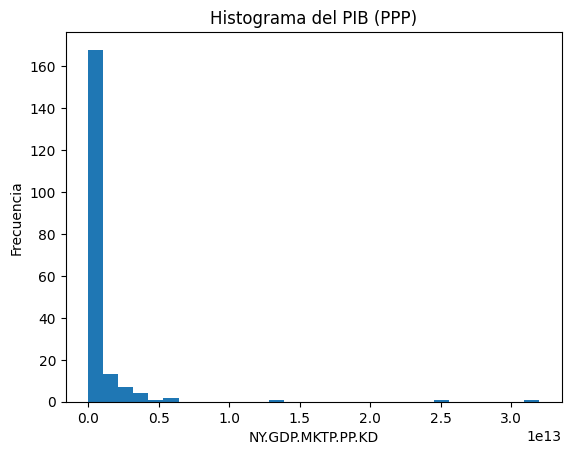

In [33]:
plt.figure()
plt.hist(df['NY.GDP.MKTP.PP.KD'], bins=30)
plt.xlabel('NY.GDP.MKTP.PP.KD')
plt.ylabel('Frecuencia')
plt.title('Histograma del PIB (PPP)')
plt.show()

In [37]:
import plotly.express as px
fig = px.choropleth(
    df,
    locations='country',
    color='NY.GDP.MKTP.PP.KD',
    hover_name='Country',
    projection='natural earth',
    title='PIB anual por paises',
    color_continuous_scale=px.colors.sequential.Blues  # Cambiar la escala de colores
)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=1000,  # Ancho del gráfico
    height=600,  # Altura del gráfico
    title_font_size=24  # Tamaño de la fuente del título
)

# Mostrar el gráfico
fig.show()

### Reducción de la dimensionalidad

Se usará PCA para agrupar

In [ ]:
df.index = df['Country']

In [ ]:
df = df.drop(columns = ['country','Country'])

In [ ]:
df.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,6420625.0,39.291937,...,3.348446e+10,3.050000e+07,1.684321,0.963600,30.700000,65.013,62.775,60.226,7.500000,77.000000
Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,9331708.0,45.028585,...,3.167001e+11,1.532150e+08,2.324653,1.290500,9.200000,68.673,66.349,63.936,2.300000,16.800000
West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,4486873.0,86.857687,...,1.044720e+10,3.159065e+06,0.580098,-3.507426,69.968564,71.502,65.170,59.691,60.865185,78.950134
Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,38264181.0,38.129890,...,4.364896e+15,-1.550000e+09,4.264071,50.189800,98.700000,79.264,74.588,69.877,98.700000,99.400000
Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,71340.0,22.265197,...,5.135585e+14,4.399200e+06,0.830619,0.001100,20.600000,73.927,71.477,69.445,9.000000,52.300000


In [ ]:
y = df['NY.GDP.MKTP.PP.KD']
X = df.drop(columns='NY.GDP.MKTP.PP.KD')

In [ ]:
#Escalar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

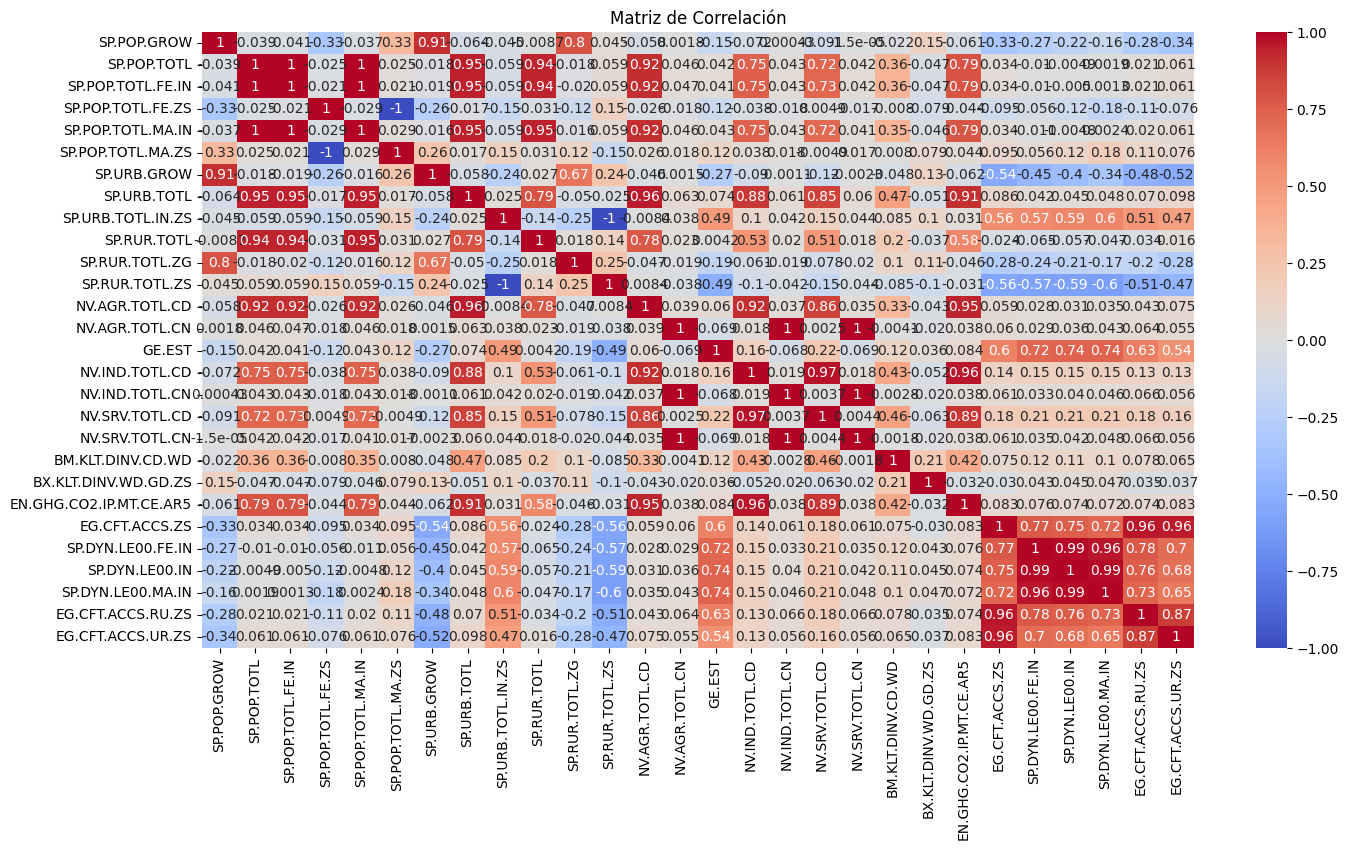

In [ ]:
#Matriz de correlación
corr = X_std.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
pca = PCA()
pca.fit(X_std)

pca.explained_variance_ratio_

array([2.95216603e-01, 2.46486913e-01, 1.07700757e-01, 1.02885606e-01,
       5.28214489e-02, 4.38793215e-02, 3.61944382e-02, 3.36784111e-02,
       2.68532783e-02, 2.13614628e-02, 1.33688819e-02, 8.11152424e-03,
       3.99576313e-03, 3.48393870e-03, 1.31893897e-03, 9.66644206e-04,
       7.95944551e-04, 4.23926521e-04, 2.55481926e-04, 1.68534082e-04,
       2.31255930e-05, 4.35408669e-06, 3.12360142e-06, 1.57848235e-06,
       9.99239672e-31, 5.82212092e-32, 1.48615480e-33, 1.48615480e-33])

In [ ]:
# Seleccionar 5 componentes
pca_5 = PCA(n_components=5)
X_std_pca = pca_5.fit_transform(X_std)

X_std_pca = pd.DataFrame(X_std_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'])
X_std_pca.head()

,CP1,CP2,CP3,CP4,CP5
0,-2.046253,-3.065171,-0.211515,-0.897442,0.345299
1,-2.168282,-3.310497,0.109859,0.654157,0.693553
2,-1.198110,-0.753850,0.118489,0.348651,0.245571
3,1.028192,-0.049061,1.125756,-1.040047,-0.274169
4,-1.672140,-2.408596,0.159428,0.401047,0.049707


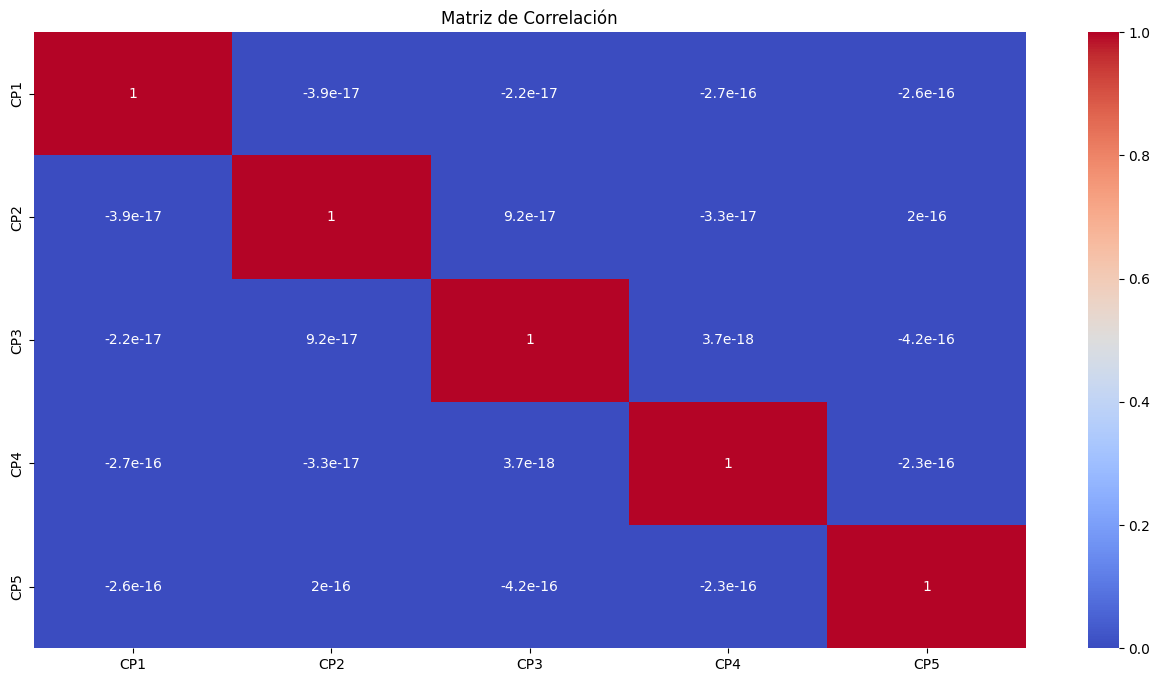

In [ ]:
#Matriz de correlación
corr = X_std_pca.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
X_std_pca

,CP1,CP2,CP3,CP4,CP5
0,-2.046253,-3.065171,-0.211515,-0.897442,0.345299
1,-2.168282,-3.310497,0.109859,0.654157,0.693553
2,-1.198110,-0.753850,0.118489,0.348651,0.245571
3,1.028192,-0.049061,1.125756,-1.040047,-0.274169
4,-1.672140,-2.408596,0.159428,0.401047,0.049707
...,...,...,...,...,...
193,-1.357610,-2.241644,0.189288,0.607146,0.358647
194,0.747669,3.396745,0.019026,1.360856,0.530980
195,0.568341,1.157625,0.049625,0.479671,-0.449531
196,0.268430,2.097453,-0.683227,-1.741088,-0.787648
